# Anomaly Detection with Random Cut Forest

In [17]:
import numpy as np
import rrcf
import pandas as pd

# Generate data
n = 730
A = 50
center = 100
phi = 30
T = 2*np.pi/100
t = np.arange(n)
sin = A*np.sin(T*t-phi*T) + center
sin[235:255] = 80

# Set tree parameters
num_trees = 40
shingle_size = 4
tree_size = 256

# Create a forest of empty trees
forest = []
for _ in range(num_trees):
    tree = rrcf.RCTree()
    forest.append(tree)
    
# Use the "shingle" generator to create rolling window
points = rrcf.shingle(sin, size=shingle_size)

# Create a dict to store anomaly score of each point
avg_codisp = {}

# For each shingle...
for index, point in enumerate(points):
    # For each tree in the forest...
    for tree in forest:
        # If tree is above permitted size, drop the oldest point (FIFO)
        if len(tree.leaves) > tree_size:
            tree.forget_point(index - tree_size)
        # Insert the new point into the tree
        tree.insert_point(point, index=index)
        # Compute codisp on the new point and take the average among all trees
        if not index in avg_codisp:
            avg_codisp[index] = 0
        avg_codisp[index] += tree.codisp(index) / num_trees

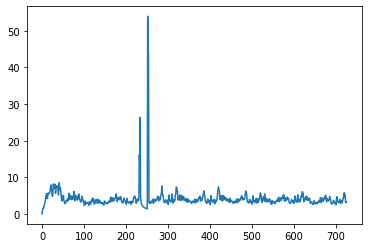

In [18]:
avg_codisp.values()
plt.plot(t[:727],avg_codisp.values())

In [16]:
#this seems to work very nicely, how about we try it for real and complex data?

In [37]:
df = pd.read_csv('~/KinKeepers/ProjectAI/Data/UCIActivityData.csv',header = None)
df.columns = ['time','ax','ay','az','none']
df.drop('none',axis = 1,inplace = True)
freq = 52
df.time = df.time*(1/52)
df['a_tot'] = np.sqrt(np.power(df[['ax','ay','az']],2).sum(axis = 1))
df.head()

,time,ax,ay,az,a_tot
0,0.000000,1502,2215,2153,3434.768988
1,0.019231,1667,2072,2047,3355.932359
2,0.038462,1611,1957,1906,3171.435952
3,0.057692,1601,1939,1831,3110.543843
4,0.076923,1643,1965,1879,3176.683018


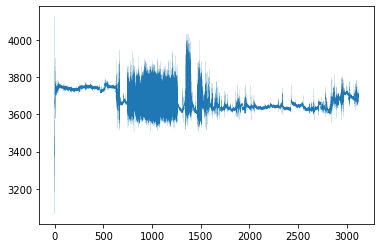

In [41]:
plt.plot(df.time,df.a_tot,linewidth=0.1)

In [ ]:
num_trees = 40
shingle_size = 4
tree_size = 256

forest = []
for _ in range(num_trees):
    tree = rrcf.RCTree()
    forest.append(tree)
    
# Use the "shingle" generator to create rolling window
points = rrcf.shingle(df.a_tot, size=shingle_size)

# Create a dict to store anomaly score of each point
avg_codisp = {}

# For each shingle...
for index, point in enumerate(points):
    # For each tree in the forest...
    for tree in forest:
        # If tree is above permitted size, drop the oldest point (FIFO)
        if len(tree.leaves) > tree_size:
            tree.forget_point(index - tree_size)
        # Insert the new point into the tree
        tree.insert_point(point, index=index)
        # Compute codisp on the new point and take the average among all trees
        if not index in avg_codisp:
            avg_codisp[index] = 0
        avg_codisp[index] += tree.codisp(index) / num_trees

In [ ]:
avg_codisp

In [ ]:
#left for now !